In [15]:
import os
import pandas as pd
import numpy as np
from glob import glob
import gspread
import h3
from tqdm import tqdm
from fcmeans import FCM
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns
# import kmean
from sklearn.cluster import KMeans
from scipy.spatial import distance
import os

In [21]:
# load tsne data
DATA_FOLDER = "/group/geog_pyloo/08_GSV/data/_curated/c_seg_hex"

GRAPHIC_PATH = "/group/geog_pyloo/08_GSV/_graphic/cluster/allcities"
if not os.path.exists(GRAPHIC_PATH):
    os.makedirs(GRAPHIC_PATH)

FILENAME = "c_seg_cat=31_res={res}_tsne.parquet"
df = pd.read_parquet(os.path.join(DATA_FOLDER, FILENAME.format(res = res)))
FILENAME_ORI = "c_seg_cat=31_res={res}.parquet"
df_ori = pd.read_parquet(os.path.join(DATA_FOLDER, FILENAME_ORI.format(res = res)))

In [18]:
def plot_wss_kmean(data, N, comment):
    """Try Kmean instead"""
    wss = []
    distorsions = []
    for i in range(2,N):
        print("cluster: ", i)
        # fcm_vol = FCM(n_clusters=i, random_state=0)
        km = KMeans(n_clusters=i, random_state=0)
        km.fit(data)
        wss.append(km.inertia_)
        distorsions.append(sum(np.min(distance.cdist(data,
        km.cluster_centers_, 'euclidean'),axis=1)) /
        data.shape[0])
        
    sns.set(style="whitegrid")
    sns.set_context("paper", rc={"font.size":10,"axes.titlesize":12,"axes.labelsize":12})

    plt.figure(figsize=(6,4))
    plt.plot(range(2,N), wss, 'bx-', color='black')
    # plt.grid(True,alpha=.3)
    # plt.legend(framealpha=.3)
    plt.xlabel('Number of clusters $c$')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method showing the optimal $c$')
    plt.savefig(os.path.join(GRAPHIC_PATH,f"elbow_volume_{N}_{comment}.png"), dpi=200, bbox_inches = 'tight')
    plt.show()
    return wss, distorsions

cluster:  2


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  3


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  4


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  5


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  6


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  7


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  8


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  9


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  10


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  11


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  12


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  13


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  14


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  15


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  16


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  17


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  18


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  19


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  20


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  21


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  22


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  23


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  24


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  25


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  26


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  27


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  28


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster:  29


/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_2135598/2928015886.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,N), wss, 'bx-', color='black')


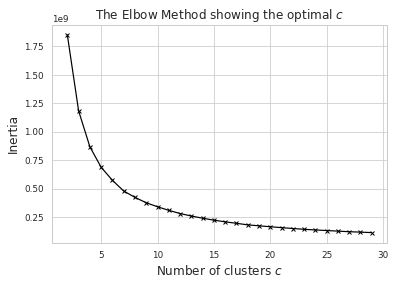

In [19]:
data = df[['tsne_1', 'tsne_2']].copy()
wss, distorsions = plot_wss_kmean(data, 30, "tsne-2d")

/tmp/ipykernel_2135598/3736970582.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(2,30), distorsions, 'bx-', color='black')


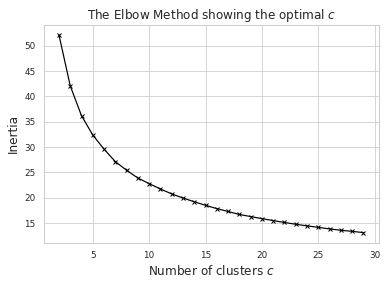

In [40]:
plt.figure(figsize=(6,4))
plt.plot(range(2,30), distorsions, 'bx-', color='black')
# plt.grid(True,alpha=.3)
# plt.legend(framealpha=.3)
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.savefig(os.path.join(GRAPHIC_PATH,f"elbow_volume_30_tsn-distorsion.png"), dpi=200, bbox_inches = 'tight')
plt.show()

In [22]:
N = 7
km = KMeans(n_clusters=N, random_state=0)
km.fit(data)
df['cluster'] = km.labels_
df_ori['cluster'] = km.labels_

/home/yuanzf/anaconda3/envs/geo38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [111]:
df.to_csv(os.path.join(DATA_FOLDER, "c_seg_cat=31_res={res}_tsne_cluster.csv".format(res = res)), index=False)

In [88]:
variables_sel_top1 = [
    'bike', 
             'building', 
             'bus', 
             'car',
       'grass', 
       'house', 
       'installation', 
       'lake+waterboday', 
       'light',
       'mountain+hill', 
       'person', 
       'pole', 
       'railing', 
       'road',
       'shrub', 
       'sidewalk', 
       'signage', 
       'sky',  
       'sportsfield',
       'table+chair', 
       'tower', 
       'traffic light', 
       'trashcan', 
       'tree', 
       'truck',
       'van', 
       'wall',
       'skyscraper',
       'window'
       ]

variable_mapping_2 = dict(zip(
       ['bike', 
             'building', 
             'bus', 
             'car',
       'grass', 
       'house', 
       'installation', 
       'lake+waterboday', 
       'light',
       'mountain+hill', 
       'person', 
       'pole', 
       'railing', 
       'road',
       'shrub', 
       'sidewalk', 
       'signage', 
       'sky',  
       'sportsfield',
       'table+chair', 
       'tower', 
       'traffic light', 
       'trashcan', 
       'tree', 
       'truck',
       'van', 
       'wall',
       'ground',
       'other',
       'skyscraper',
       'window'],
       ['bike', 
             'building', 
             'bus', 
             'car',
       'grass', 
       'house', 
       'furniture', 
       'nature', 
       'furniture', 
       'nature',  
       'person', 
       'furniture', 
       'railing', 
       'road',
       'shrub', 
       'sidewalk', 
       'signage', 
       'sky',  
       'sportsfield',
       'furniture', 
       'tower', 
       'furniture', 
       'furniture', 
       'tree', 
       'truck',
       'van', 
       'wall',
       'other',
       'other',
       'skyscraper',
       'building',])
)

In [77]:
variables_sel_top2 = [
    'bike',
 'bus',
 'car',
 'house',
 'person',
 'railing',
 'road',
 'sidewalk',
 'truck',
 'van']

In [106]:
variables_sel_top1_order = [
    'skyscraper',
    'building',
    'house',
    'wall',
    'window',
    'road',
    'sidewalk',
    'traffic light',
    'trashcan',
    'railing',
    'light',
    'pole',
    'table+chair',
    'signage',
    'installation', 
    'sportsfield',
    'bike',
    'person',
    'bus',
    'truck',
    'van',
    'car',
    'grass',
    'shrub', 
    'tree',
    'lake+waterboday',
    'mountain+hill',
    'sky'
]

In [107]:
# summarize the cluster type
df_summary = df_ori[variables_sel_top1_order+["cluster"]].groupby("cluster").mean().stack().reset_index()\
.rename(columns = {"level_1":"variable", 0:"std_value"})


df_summary_update = []
for v in df_summary["category"].unique():
    temp = df_summary[df_summary["category"]==v].reset_index(drop = True)
    temp["norm_value"] = (temp["std_value"] - temp["std_value"].min())/(temp["std_value"].max() - temp["std_value"].min())
    df_summary_update.append(temp)
    
df_summary_update = pd.concat(df_summary_update).reset_index()

# fig, ax = plt.subplots(figsize = (10,7))
# sns.pointplot(
#     data = df_summary_update,
#     x = 'cluster',
#     y = 'norm_value',
#     hue = "category"
# )
# ax.set_ylim([-0.25, 1.25])

# # put the legend outside
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [108]:
df_heat = df_summary_update.pivot(
    columns= "category", values = "norm_value", index = "cluster"
)[variables_sel_top1_order]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0.5, 1, 'skyscraper'),
  Text(1.5, 1, 'building'),
  Text(2.5, 1, 'house'),
  Text(3.5, 1, 'wall'),
  Text(4.5, 1, 'window'),
  Text(5.5, 1, 'road'),
  Text(6.5, 1, 'sidewalk'),
  Text(7.5, 1, 'traffic light'),
  Text(8.5, 1, 'trashcan'),
  Text(9.5, 1, 'railing'),
  Text(10.5, 1, 'light'),
  Text(11.5, 1, 'pole'),
  Text(12.5, 1, 'table+chair'),
  Text(13.5, 1, 'signage'),
  Text(14.5, 1, 'installation'),
  Text(15.5, 1, 'sportsfield'),
  Text(16.5, 1, 'bike'),
  Text(17.5, 1, 'person'),
  Text(18.5, 1, 'bus'),
  Text(19.5, 1, 'truck'),
  Text(20.5, 1, 'van'),
  Text(21.5, 1, 'car'),
  Text(22.5, 1, 'grass'),
  Text(23.5, 1, 'shrub'),
  Text(24.5, 1, 'tree'),
  Text(25.5, 1, 'lake+waterboday'),
  Text(26.5, 1, 'mountain+hill'),
  Text(27.5, 1, 'sky')])

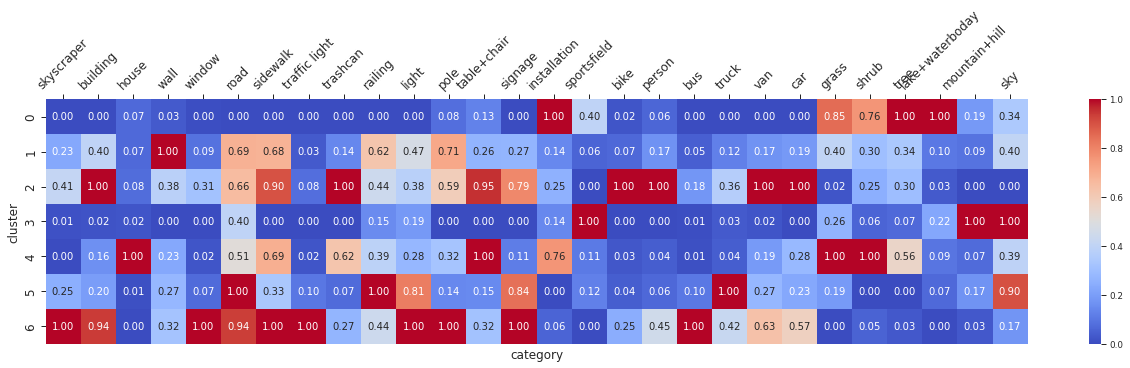

In [109]:
# use heatmap to visualize the cluster
fig, ax = plt.subplots(figsize = (22,4.5))
# use a gradient color
sns.heatmap(df_heat, cmap = "coolwarm", annot = True, fmt=".2f", 
            ax = ax)
# show axis annotation larger
ax.tick_params(axis='both', which='major', labelsize=12)
# show ticks to the left
ax.yaxis.tick_left()
# show ticks to the bottom
ax.xaxis.tick_top()
# rotate the x axis
plt.xticks(rotation=45)


In [55]:
# visualize one city
# get the geometry
from shapely.geometry import Polygon
import geopandas as gpd

def cell_to_shapely(cell):
    coords = h3.h3_to_geo_boundary(cell)
    flipped = tuple(coord[::-1] for coord in coords)
    return Polygon(flipped)


# loop through all cities and save the graphic and data
def get_result(city):
    cityabbr = city.lower().replace(" ", "")
    sample = df[df["city_lower"]==cityabbr].reset_index(drop = True)
    h3_geoms = sample['hex_id'].apply(lambda x: cell_to_shapely(x))
    df_sel_gdf = gpd.GeoDataFrame(sample[['hex_id',"cluster"]], geometry = h3_geoms)
    df_sel_gdf.crs = "EPSG:4326"
    df_sel_gdf['cluster'] = df_sel_gdf['cluster'].astype(str)
    df_sel_gdf.plot(figsize = (10,10), column = "cluster", legend = True, linewidth = 0.1)
    plt.title(city)
    plt.savefig(os.path.join(GRAPHIC_PATH, f"{city}_cluster=7-tsn-res=9.png"), dpi=200, bbox_inches = 'tight')
    exportfolder = os.path.join(GRAPHIC_PATH, "allcity")
    if not os.path.exists(exportfolder):
        os.makedirs(exportfolder)
    df_sel_gdf.to_file(os.path.join(exportfolder,f"{city}_cluster=7-tsn-res=9.geojson"), driver = "GeoJSON")
    return df_sel_gdf

In [ ]:
allgdf = []
for city in df["city_lower"].unique():
    df_sel_gdf = get_result(city)
    allgdf.append(df_sel_gdf)
allgdf = pd.concat(allgdf).reset_index(drop = True)

<AxesSubplot:>

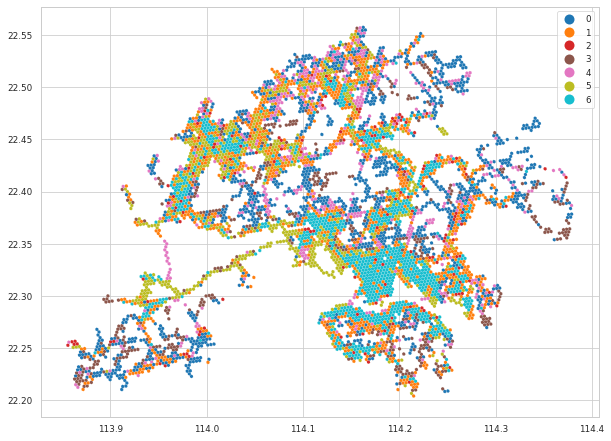

In [49]:
df_sel_gdf.plot(figsize = (10,10), column = "cluster", legend = True, linewidth = 0.1)

## 2. Summarize the results across cities

In [130]:
df_summary= pd.read_csv(os.path.join(DATA_FOLDER, "allcity_cluster=7-tsn-res=9.csv")).groupby(["city_lower","cluster"])\
    .size().reset_index().rename(columns = {0:"count"}).pivot(
    columns = "cluster", values = "count", index = "city_lower").fillna(0)
df_summary['total'] = df_summary.sum(axis = 1)
df_summary_prop = df_summary.copy()
for i in range(N):
    df_summary_prop[i] = df_summary_prop[i]/df_summary_prop['total']
df_summary_prop.sort_values(6, ascending = False).head(40)

cluster,0,1,2,3,4,5,6,total
city_lower,,,,,,,,
bogotá,0.014844,0.109967,0.018479,0.017267,0.008179,0.067858,0.763405,3301.0
seoul,0.008216,0.116290,0.037447,0.005530,0.016116,0.114236,0.702165,6329.0
tokyo,0.010837,0.166559,0.023481,0.001935,0.016256,0.096375,0.684557,7751.0
paris,0.076014,0.071791,0.146115,0.000845,0.009291,0.030405,0.665541,1184.0
santiago,0.020761,0.100346,0.211073,0.000000,0.003460,0.051903,0.612457,289.0
nagoya,0.009637,0.267070,0.003029,0.022577,0.007985,0.115088,0.574615,3632.0
riodejaneiro,0.055588,0.201397,0.066065,0.016589,0.023865,0.093423,0.543073,3436.0
telaviv,0.025000,0.077273,0.247727,0.020455,0.020455,0.070455,0.538636,440.0
belohorizonte,0.015140,0.349735,0.042392,0.031037,0.001893,0.048070,0.511734,2642.0


In [131]:
df_summary_prop.to_csv(os.path.join(DATA_FOLDER, "allcity_cluster=7-tsn-res=9_city-level_summary.csv"))